In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np


def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)


N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

RANDOM_SEED = 139
train_labels = get_labels(train_data)

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx, yy = get_grid(train_data)

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1,
                                    random_state=RANDOM_SEED)

deep_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1,
                                 random_state=RANDOM_SEED)
# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)


predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

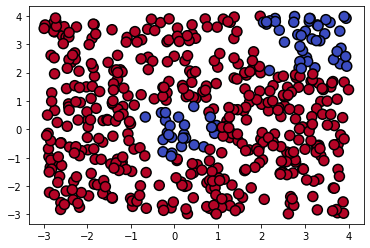

In [5]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

<ipython-input-6-9fd3e2ad3627>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
<ipython-input-6-9fd3e2ad3627>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')


Text(0.5, 1.0, 'Deep Random Forest')

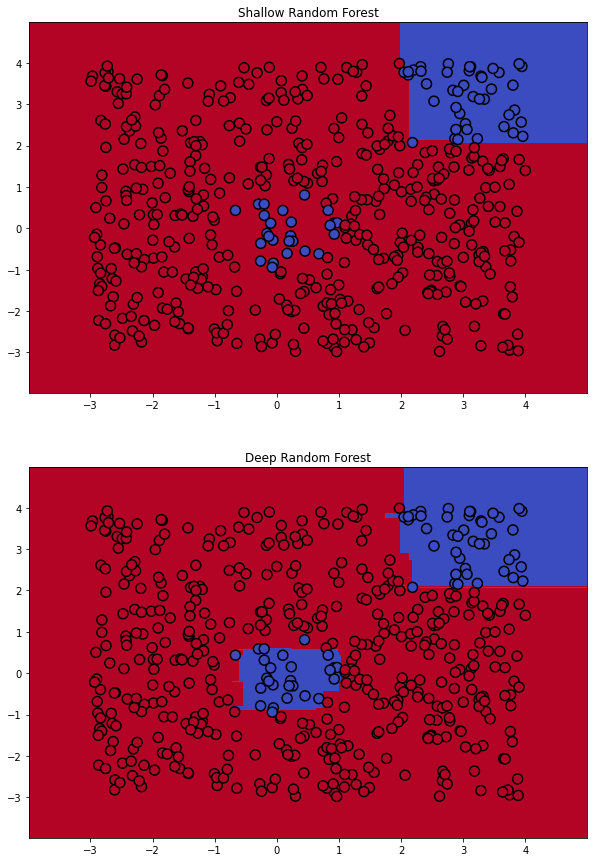

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./data/spam7.csv')
mydict = {
    "y": 1,
    "n": 0,
}

df['spam'] = df['yesno'].apply(mydict.get)
df.drop(['yesno', 'Unnamed: 0'], axis=1, inplace=True)

X = df.drop(['spam'], axis=1)
y = df['spam']

coll = X.columns

pf = PolynomialFeatures(interaction_only=True, include_bias=False)
poly_data = pf.fit_transform(X)
poly_cols = pf.get_feature_names(X.columns)
poly_cols = [x.replace(' ', '_') for x in poly_cols]

poly_X = pd.DataFrame(poly_data, columns=poly_cols)


random_state=42
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.20, random_state=random_state)

model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                    min_samples_leaf=1, subsample=1,max_features=None, random_state=random_state)
model.fit(X_train, y_train)

Y_predicted = model.predict(X_test)
print(accuracy_score(y_test,Y_predicted))

0.8653637350705755


<AxesSubplot:>

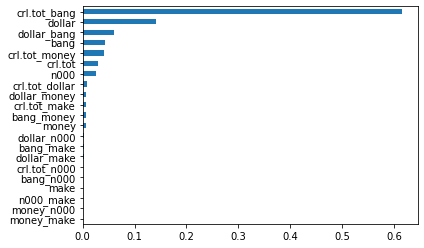

In [13]:
imp_f = pd.Series(model.feature_importances_)
imp_f.index = poly_cols
imp_f.sort_values(inplace = True)
imp_f.plot(kind = 'barh')


In [11]:
coll

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make'], dtype='object')